The Credit Card Fraud Detection goal is to build models that can accurately distinguish between fraudulent and non-fraudulent transactions using these features, essential for enhancing financial transaction security and fraud prevention measures.

In [7]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from collections import Counter
from collections import Counter
print("Libraries imported")

Libraries imported


## Analysis

In [8]:
# Load the dataset using the correct file name
df = pd.read_csv('C:\\Users\\NIDHI RANJAN\\Desktop\\credit crad fraud data.csv')

# Display the first few rows of the dataframe to confirm it's loaded correctly
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [35]:
df.shape

(1000000, 8)

In [7]:
# Calculate percentages assuming 'fraud' column exists
not_frauds_percent = round(df['fraud'].value_counts()[0] / len(df) * 100, 2)
frauds_percent = round(df['fraud'].value_counts()[1] / len(df) * 100, 2)

# Print percentages
print('Not Frauds:', not_frauds_percent, '% of the dataset')
print('Frauds:', frauds_percent, '% of the dataset')

Not Frauds: 91.26 % of the dataset
Frauds: 8.74 % of the dataset


## Visualization

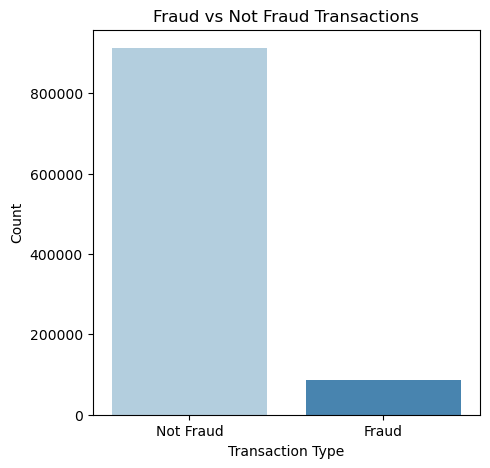

In [8]:
# Calculate fraud counts
fraud_counts = df['fraud'].value_counts()

# Map numeric labels to descriptive labels
fraud_counts.index = fraud_counts.index.map({0: 'Not Fraud', 1: 'Fraud'})

# Plotting a bar chart with elegant shades of blue
plt.figure(figsize=(5, 5))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='Blues')
plt.title('Fraud vs Not Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

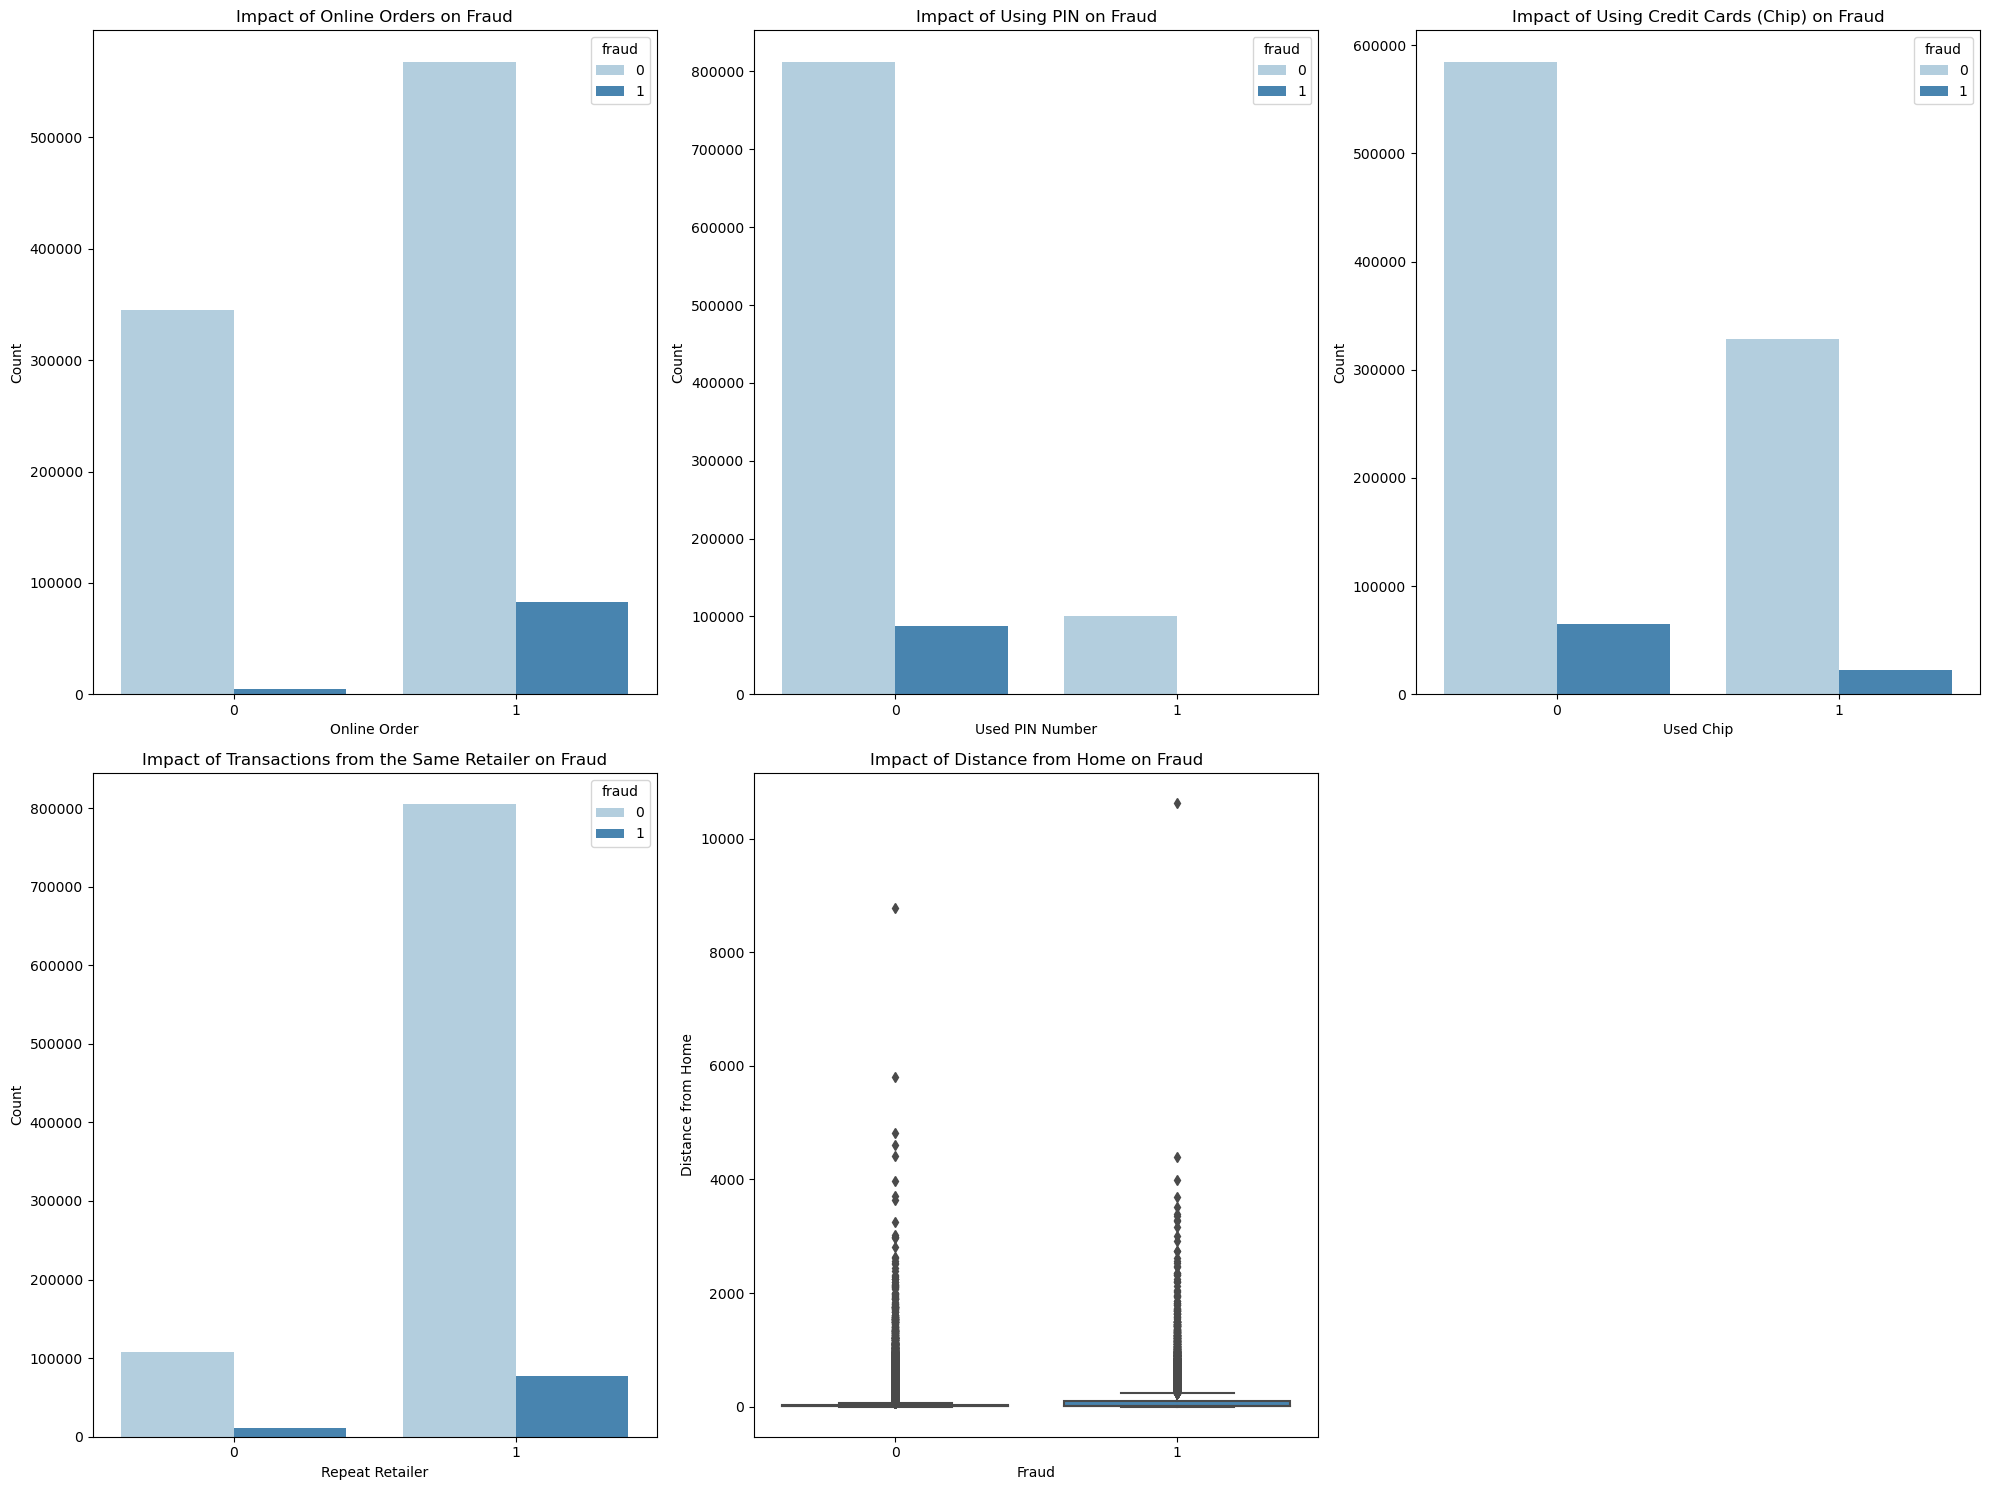

In [9]:
def plot_impact_on_fraud(df):
    plt.figure(figsize=(20, 15))

    # Impact of Online Orders on Fraud
    plt.subplot(2, 3, 1)
    sns.countplot(x='online_order', hue='fraud', data=df, palette='Blues')
    plt.title('Impact of Online Orders on Fraud')
    plt.xlabel('Online Order')
    plt.ylabel('Count')

    # Impact of Using PIN on Fraud
    plt.subplot(2, 3, 2)
    sns.countplot(x='used_pin_number', hue='fraud', data=df, palette='Blues')
    plt.title('Impact of Using PIN on Fraud')
    plt.xlabel('Used PIN Number')
    plt.ylabel('Count')

    # Impact of Using Credit Cards (Chip) on Fraud
    plt.subplot(2, 3, 3)
    sns.countplot(x='used_chip', hue='fraud', data=df, palette='Blues')
    plt.title('Impact of Using Credit Cards (Chip) on Fraud')
    plt.xlabel('Used Chip')
    plt.ylabel('Count')

    # Impact of Transactions from the Same Retailer on Fraud
    plt.subplot(2, 3, 4)
    sns.countplot(x='repeat_retailer', hue='fraud', data=df, palette='Blues')
    plt.title('Impact of Transactions from the Same Retailer on Fraud')
    plt.xlabel('Repeat Retailer')
    plt.ylabel('Count')

    # Impact of Distance from Home on Fraud
    plt.subplot(2, 3, 5)
    sns.boxplot(x='fraud', y='distance_from_home', data=df, palette='Blues')
    plt.title('Impact of Distance from Home on Fraud')
    plt.xlabel('Fraud')
    plt.ylabel('Distance from Home')

    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_impact_on_fraud(df)

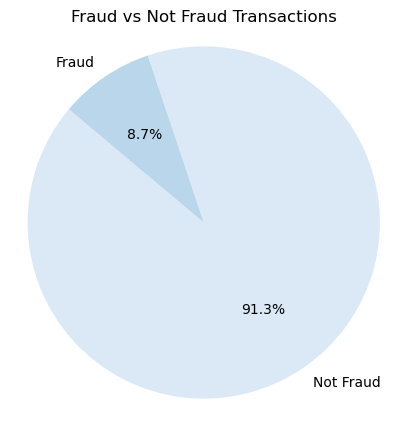

In [10]:
fraud_counts = df['fraud'].value_counts()

# Map numeric labels to descriptive labels
fraud_counts.index = fraud_counts.index.map({0: 'Not Fraud', 1: 'Fraud'})

# Plotting a pie chart with elegant shades of blue
plt.figure(figsize=(5, 5))
plt.pie(fraud_counts, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Blues'))
plt.title('Fraud vs Not Fraud Transactions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

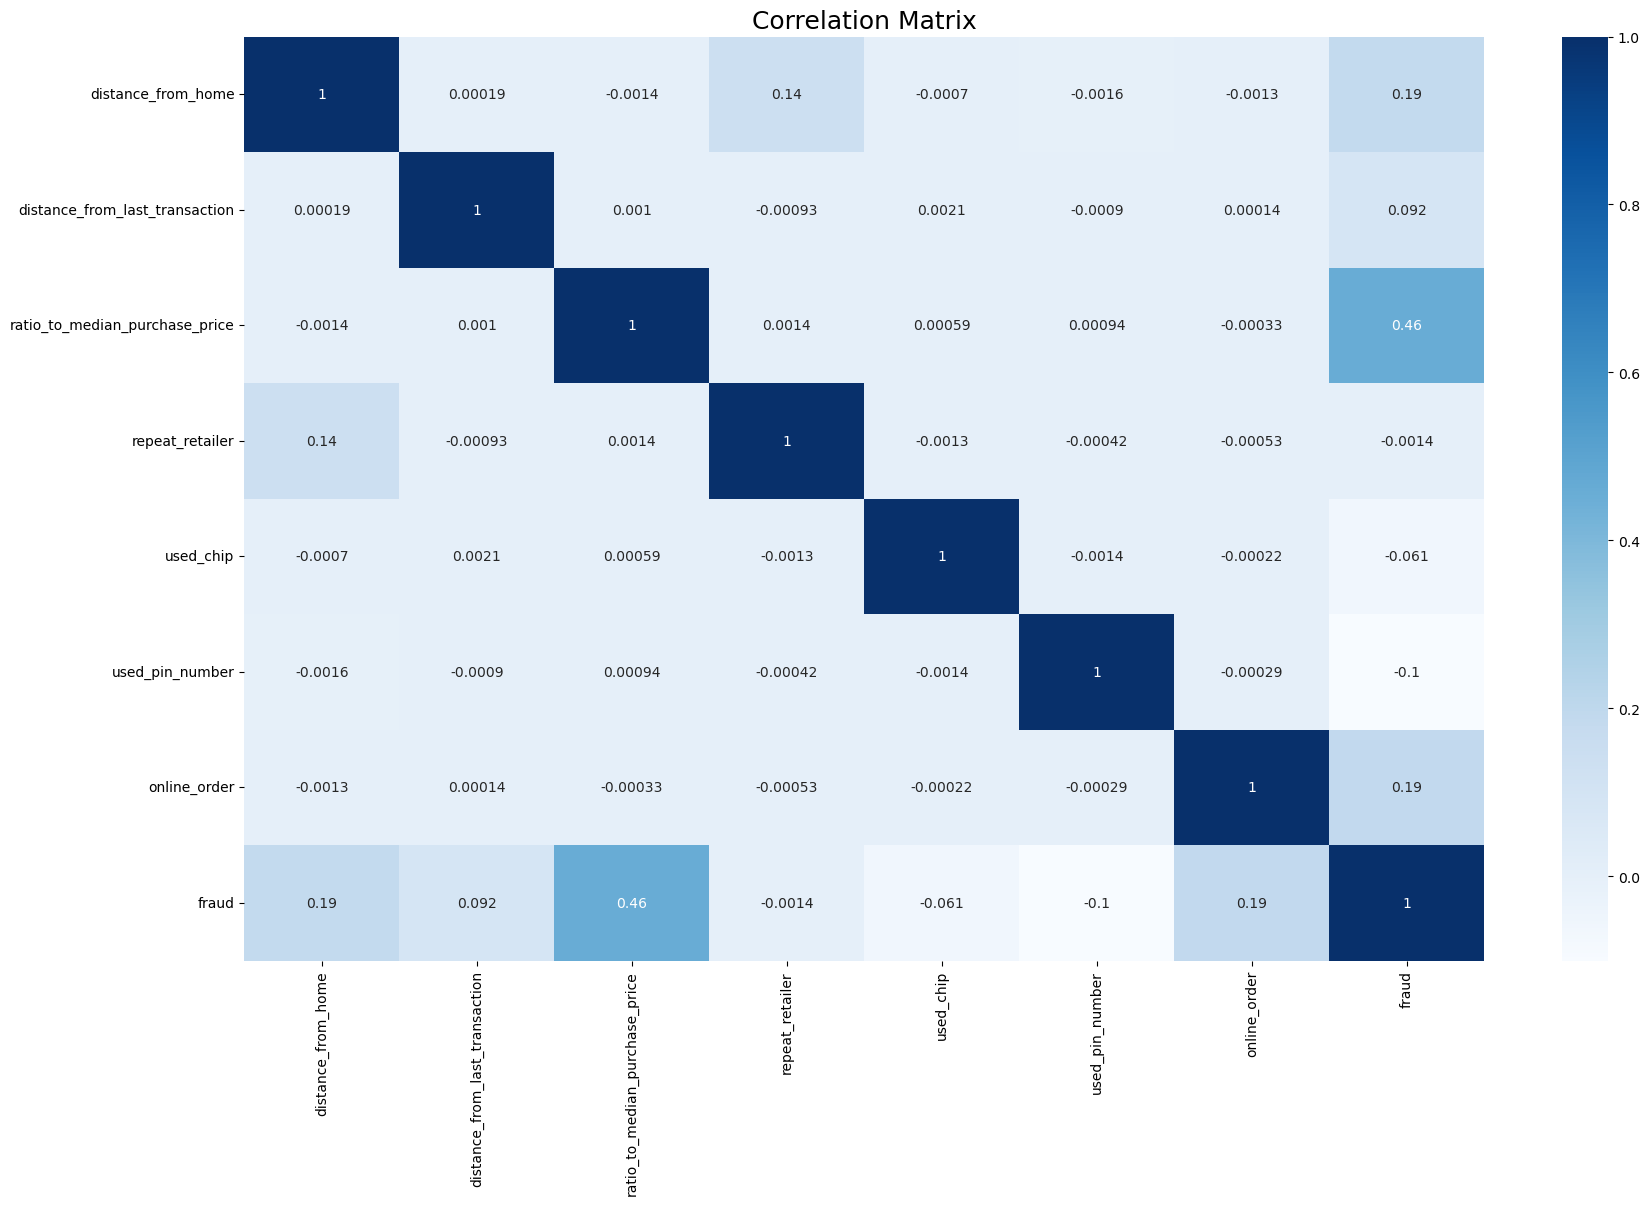

In [11]:
corr = df.corr()

# Set the figure size
plt.figure(figsize=(20, 12))

# Plot heatmap with blue color palette
sns.heatmap(corr, cmap='Blues', xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

# Add title
plt.title('Correlation Matrix', fontsize=18)

# Show plot
plt.show()


## Pre-processing

In [9]:
df = df.copy()

# Remove duplicates inplace
df.drop_duplicates(inplace=True)
print("Duplicates removed successfully.")

# Print the count of data after removing duplicates
print("Count of data after removing duplicates:", len(df))

Duplicates removed successfully.
Count of data after removing duplicates: 1000000


Checking for outliers

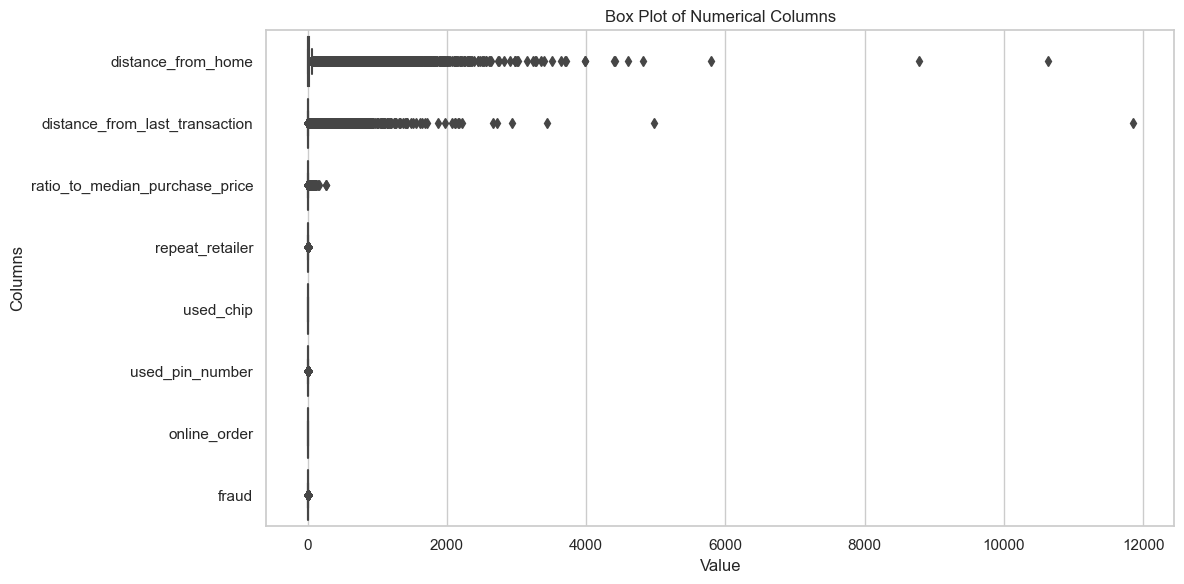

In [10]:
# Create a copy of the original DataFrame
df = df.copy()

# Selecting numerical columns to plot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set Seaborn style and color palette
sns.set(style="whitegrid", palette="Blues_r")

# Create a figure with matplotlib
plt.figure(figsize=(12, 6))

# Plotting boxplots for each numerical column
sns.boxplot(data=df[numerical_columns], orient="h")
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.tight_layout()

# Show plot
plt.show()

In [11]:
def detect_outliers(df, numerical_columns):
    outlier_counts = {}
    for column in numerical_columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)]
        outlier_counts[column] = len(outliers)
    return outlier_counts

outlier_counts = detect_outliers(df, numerical_columns)
print(outlier_counts)

{'distance_from_home': 103631, 'distance_from_last_transaction': 124367, 'ratio_to_median_purchase_price': 84386, 'repeat_retailer': 118464, 'used_chip': 0, 'used_pin_number': 100608, 'online_order': 0, 'fraud': 87403}


Outliers to remove:

distance_from_home and distance_from_last_transaction: These columns have a large number of outliers, which may indicate errors in data collection or measurement. Removing these outliers can help improve the model's performance.
ratio_to_median_purchase_price: This column has a significant number of outliers, which may affect the model's performance. Removing these outliers can help reduce the noise in the data.                   

Outliers to keep:

used_chip and online_order: These columns have no outliers, which suggests that they may not be relevant to the fraud detection task. Keeping these columns can help maintain the integrity of the data.

fraud: This column is the target variable, and removing outliers from it may not be necessary. Keeping all the data points, including outliers, can help the model learn to detect fraud more effectively.

In [12]:
def remove_common_outliers(df, columns, n):
    outlier_list = []
    
    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
        outlier_list.extend(outlier_list_column)
    
    outlier_list = Counter(outlier_list)
    multiple_outliers = [k for k, v in outlier_list.items() if v >= len(columns) - n]
    
    num_common_outliers_removed = len(multiple_outliers)
    cleaned_df = df.copy()  # Create a copy of the original DataFrame
    cleaned_df.drop(multiple_outliers, inplace=True)  # Drop the outliers from the copy
    
    return cleaned_df, num_common_outliers_removed

# Remove common outliers from distance_from_home, distance_from_last_transaction, and ratio_to_median_purchase_price
cleaned_df, num_removed = remove_common_outliers(df, ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price'], 1)

print(f"Number of common outliers removed: {num_removed}")
print("Shape of cleaned DataFrame:", cleaned_df.shape)


Number of common outliers removed: 29994
Shape of cleaned DataFrame: (970006, 8)


## Splitting Data

In [13]:
# Assuming 'fraud' is your target variable
X = cleaned_df.drop('fraud', axis=1)  # Features (excluding the target 'fraud' column)
y = cleaned_df['fraud']  # Target variable

# Importing train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Performing stratified split with a test size of 30% and a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Printing counts of train and test sets
print("Train set:")
print("Total rows:", len(X_train))
print("Frauds:", y_train.sum())
print("Not Frauds:", (y_train == 0).sum())
print("\nTest set:")
print("Total rows:", len(X_test))
print("Frauds:", y_test.sum())
print("Not Frauds:", (y_test == 0).sum())

Train set:
Total rows: 679004
Frauds: 50311
Not Frauds: 628693

Test set:
Total rows: 291002
Frauds: 21562
Not Frauds: 269440


## Feature Scaling
-Standardization (or scaling) is a preprocessing step that transforms data to have a mean of 0 and a standard deviation of 1 This ensures that all features contribute equally to the model training proces.

-It's important to scale features when their scales differ widely or when using algorithms that are sensitive to feature scales (e.g., SVMs, KNN)

In [14]:
# Creating function for scaling
def Standard_Scaler(df, col_names):
    scaler = StandardScaler()
    df_scaled = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    df_scaled[col_names] = scaler.fit_transform(df_scaled[col_names])
    
    return df_scaled

# Example usage:
col_names = ['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order']  # List of column names to scale

# Apply StandardScaler to X_train and X_test
X_train_scaled = Standard_Scaler(X_train, col_names)
X_test_scaled = Standard_Scaler(X_test, col_names)

# Print to verify
print("X_train (scaled):")
print(X_train_scaled.head())

print("\nX_test (scaled):")
print(X_test_scaled.head())

X_train (scaled):
        distance_from_home  distance_from_last_transaction  \
616824           -0.223100                       -0.094541   
152826           -0.110850                        0.234566   
20649            -0.276363                       -0.165214   
409679           -0.345781                        0.118447   
444107           -0.159784                       -0.086403   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
616824                        0.657170         0.370909  -0.734024   
152826                       -0.431801         0.370909  -0.734024   
20649                        -0.443273         0.370909   1.362353   
409679                       -0.149096         0.370909  -0.734024   
444107                       -0.571004         0.370909  -0.734024   

        used_pin_number  online_order  
616824        -0.334237      0.733119  
152826        -0.334237      0.733119  
20649         -0.334237     -1.364035  
409679        -0.334237     

In [60]:
pip install scikit-learn==0.24.2

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/7.5 MB 165.2 kB/s eta 0:00:46
     ---------------------------------------- 0.0/7.5 MB 187.9 kB/s eta 0:00:40
     ---------------------------------------- 0.1/7.5 MB 297.7 kB/s eta 0:00:26
      --------------------------------------- 0.1/7.5 MB 422.8 kB/s eta 0:00:18
     - -------------------------------------- 0.2/7.5 MB 734.2 kB/s eta 0:00:10
     - -------------------------------------- 0.4/7.5 MB 1.1 MB/s eta 0:00:07
     -- ------------------------------------- 0.5/7.5 MB 1.4 MB/s eta 0:00:06
     ----- ---------------------------------- 1.0/7.5 MB 2.4 MB/s eta 0:00:03
     -------- ------------------------------- 1.6/7.5 MB 3.5 MB/s eta 0:00:02
   

  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [62 lines of output]
  <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  Partial import of sklearn during the build process.
  <string>:116: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
  INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_proce

In [72]:
pip install --upgrade imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [74]:

pip install scikit-learn imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)

scikit-learn version: 1.3.0
imbalanced-learn version: 0.12.3


In [17]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE oversampler
smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=100)

# Perform oversampling
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after oversampling
print("Before Up Sampling:", Counter(y_train))
print("After Up Sampling:", Counter(y_train_resampled))

Before Up Sampling: Counter({0: 628693, 1: 50311})
After Up Sampling: Counter({0: 628693, 1: 628693})


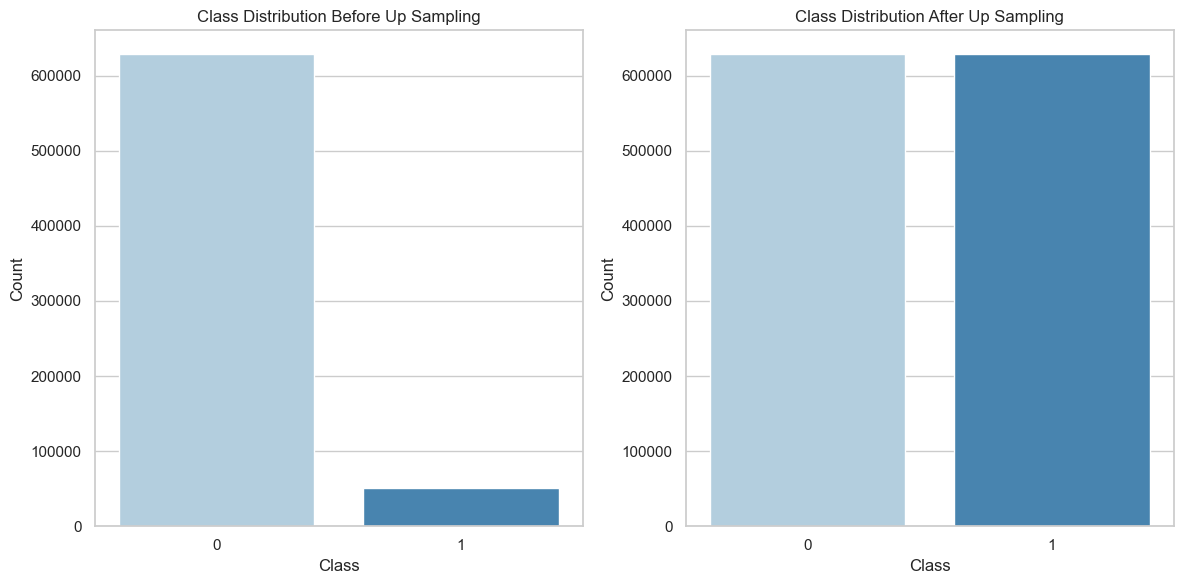

In [18]:
# Calculate class distribution before and after oversampling
before_counts = Counter(y_train)
after_counts = Counter(y_train_resampled)

# Plotting the class distribution
plt.figure(figsize=(12, 6))

# Plot before oversampling
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='Blues')
plt.title('Class Distribution Before Up Sampling')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot after oversampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled, palette='Blues')
plt.title('Class Distribution After Up Sampling')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression classifier with increased max_iter and solver
log_reg = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)

# Train the model on scaled oversampled data
log_reg.fit(X_train_scaled, y_train_resampled)

# Predict on test set
y_pred = log_reg.predict(X_test_scaled)
# Calculate accuracy
accuracy = log_reg.score(X_test_scaled, y_test)
print("\nLogistic Regression Accuracy:", accuracy * 100)


Logistic Regression Accuracy: 93.45605872124591


In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

Confusion Matrix:
[[251389  18051]
 [   992  20570]]

Precision Score: 0.5326117915123897


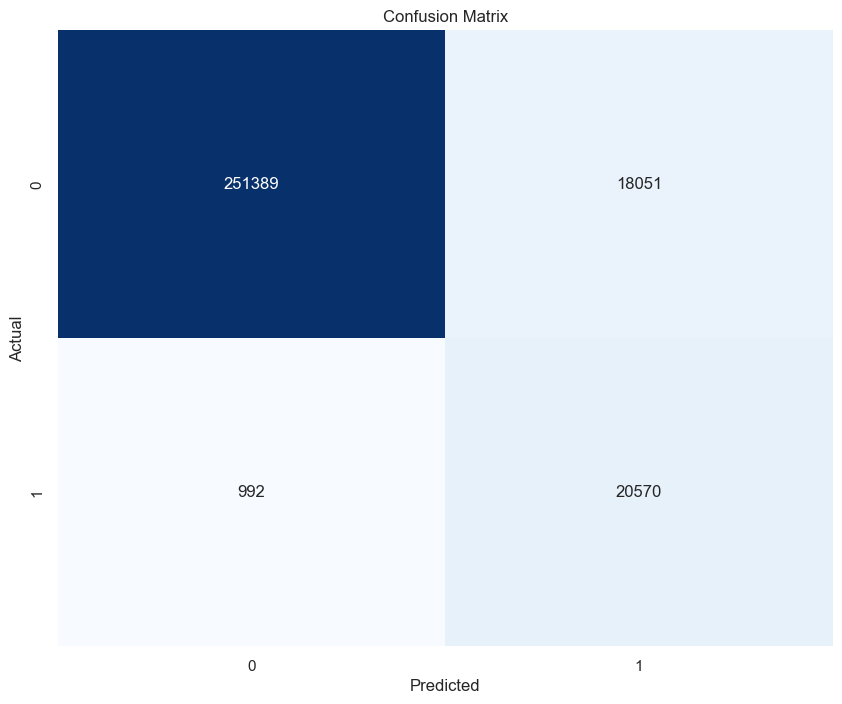


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    269440
           1       0.53      0.95      0.68     21562

    accuracy                           0.93    291002
   macro avg       0.76      0.94      0.82    291002
weighted avg       0.96      0.93      0.94    291002



In [26]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate precision score
precision = precision_score(y_test, y_pred)
print("\nPrecision Score:", precision)

# Plot confusion matrix with light blue palette
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

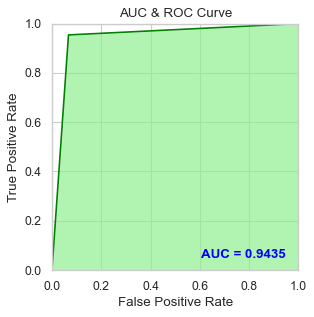

In [31]:
#plotting the ROC(Recieving operative characteristics) and AUC(area under the curve)
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc = roc_auc_score(y_test, y_pred)

false_positive_rate, true_positive_rate, thresolds =roc_curve(y_test, y_pred)

plt.figure(figsize=(5, 4), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % roc_auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()